In [759]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 20)

In [760]:
df = pd.read_csv("E:\\ML\\DataSets\\adult.csv")

In [761]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5000 non-null   object
 1   workclass       5000 non-null   object
 2   fnlwgt          5000 non-null   object
 3   education       5000 non-null   object
 4   education_num   5000 non-null   object
 5   marital_status  5000 non-null   object
 6   occupation      5000 non-null   object
 7   relationship    5000 non-null   object
 8   race            5000 non-null   object
 9   sex             5000 non-null   object
 10  capital_gain    5000 non-null   int64 
 11  capital_loss    5000 non-null   int64 
 12  hours_per_week  5000 non-null   int64 
 13  native_country  5000 non-null   object
 14  income          5000 non-null   object
dtypes: int64(3), object(12)
memory usage: 586.1+ KB


In [762]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,#NAME?,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [763]:
df.drop(["education"],axis=1,inplace=True)

In [764]:
df

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,#NAME?,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43,Private,222971,3,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Mexico,<=50K
4996,31,Private,259425,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4997,47,Self-emp-inc,212120,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4998,#NAME?,Private,245880,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,60,United-States,<=50K


In [765]:
df["relationship"].value_counts()

Husband           2001
Not-in-family     1292
Own-child          770
Unmarried          544
Wife               245
Other-relative     148
Name: relationship, dtype: int64

In [766]:
df[df["relationship"]=="Husband"]["sex"].value_counts()

Male      1978
#NAME?      23
Name: sex, dtype: int64

In [767]:
df.describe()

,capital_gain,capital_loss,hours_per_week
count,5000.000000,5000.000000,5000.000000
mean,1033.640200,93.696800,40.519000
std,7051.802077,410.801418,12.109193
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,40.000000
50%,0.000000,0.000000,40.000000
75%,0.000000,0.000000,45.000000
max,99999.000000,2547.000000,99.000000


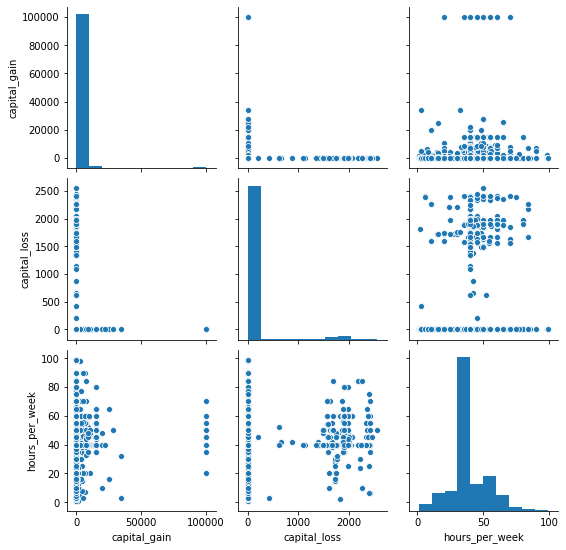

In [768]:
sns.pairplot(df)   # Not needed for classification use cases

In [769]:
df["age"].value_counts().sort_index()

#NAME?     48
17         60
18         76
19        109
20        128
         ... 
80          3
81          4
82          1
88          1
90          7
Name: age, Length: 69, dtype: int64

In [770]:
df["workclass"].value_counts()  # Treat 331 records with ? where occupation also ?

Private             3435
Self-emp-not-inc     383
?                    331
Local-gov            329
State-gov            193
Self-emp-inc         182
Federal-gov          146
Without-pay            1
Name: workclass, dtype: int64

In [771]:
df[df["workclass"]=='?']

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
27,54,?,180211,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4942,17,?,139183,6,Never-married,?,Own-child,White,Female,0,0,15,United-States,<=50K
4958,20,?,293136,10,Never-married,?,Own-child,White,Female,0,0,35,United-States,<=50K
4970,51,?,203953,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,>50K
4980,45,?,144354,5,Separated,?,Own-child,Black,Male,0,0,40,United-States,<=50K


In [772]:
df.fnlwgt.value_counts().sort_index()

#NAME?    107
100029      1
100188      1
100219      1
100345      1
         ... 
99549       1
99697       1
99784       1
99835       1
99928       1
Name: fnlwgt, Length: 4507, dtype: int64

In [773]:
df.education_num.value_counts().sort_index() # No duplicate category . Trea null(#NAME?)

#NAME?      57
1            7
10        1114
11         215
12         163
13         819
14         251
15          88
16          55
2           22
3           43
4           98
5           74
6          144
7          198
8           55
9         1597
Name: education_num, dtype: int64

In [774]:
df.marital_status.value_counts() # No duplicate category . no null

Married-civ-spouse       2270
Never-married            1659
Divorced                  682
Widowed                   160
Separated                 158
Married-spouse-absent      66
Married-AF-spouse           5
Name: marital_status, dtype: int64

In [775]:
df.occupation.value_counts() # Treat NULL (?) . No dup category

Prof-specialty       625
Craft-repair         619
Exec-managerial      618
Sales                588
Adm-clerical         576
Other-service        495
?                    331
Machine-op-inspct    312
Transport-moving     247
Handlers-cleaners    196
Farming-fishing      143
Tech-support         140
Protective-serv       90
Priv-house-serv       18
Armed-Forces           2
Name: occupation, dtype: int64

In [776]:
df.relationship.value_counts()# No duplicate category . no null

Husband           2001
Not-in-family     1292
Own-child          770
Unmarried          544
Wife               245
Other-relative     148
Name: relationship, dtype: int64

In [777]:
df.race.value_counts()  # No duplicate category . Treat null

White                 4021
Black                  493
#NAME?                 264
Asian-Pac-Islander     145
Amer-Indian-Eskimo      48
Other                   29
Name: race, dtype: int64

In [778]:
df.sex.value_counts() # No duplicate category . Treat null

Male      3332
Female    1621
#NAME?      47
Name: sex, dtype: int64

In [779]:
df.native_country.value_counts() # Treat NULL (?)

United-States    4465
Mexico            104
?                  97
Canada             28
Philippines        22
                 ... 
Thailand            2
Laos                2
Yugoslavia          2
Hong                1
Scotland            1
Name: native_country, Length: 40, dtype: int64

In [780]:
df["capital_gain"].value_counts().sort_index() #  no null

0        4579
114         1
401         1
594         7
914         3
         ... 
25124       1
25236       1
27828       2
34095       2
99999      22
Name: capital_gain, Length: 83, dtype: int64

In [781]:
df["capital_loss"].value_counts().sort_index()#  no null

0       4745
213        1
419        1
625        2
653        1
        ... 
2377       2
2392       4
2415      10
2444       1
2547       1
Name: capital_loss, Length: 55, dtype: int64

In [782]:
df["hours_per_week"].value_counts().sort_index() #  no null

1      3
2      6
3      8
4      3
5     15
      ..
84    10
85     2
90     4
98     2
99     7
Name: hours_per_week, Length: 74, dtype: int64

In [783]:
df["income"].value_counts().sort_index()

<=50K    3779
>50K     1221
Name: income, dtype: int64

# Step 1: Replace with NaN for different string type Null values

In [784]:
df["age"].value_counts(dropna=False).sort_index()

#NAME?     48
17         60
18         76
19        109
20        128
         ... 
80          3
81          4
82          1
88          1
90          7
Name: age, Length: 69, dtype: int64

In [785]:
df["age"].replace({"#NAME?":np.nan},inplace=True)

In [786]:
df["age"].value_counts(dropna=False).sort_index()

17      60
18      76
19     109
20     128
21      98
      ... 
81       4
82       1
88       1
90       7
NaN     48
Name: age, Length: 69, dtype: int64

In [787]:
df["workclass"].value_counts(dropna=False).sort_index()

?                    331
Federal-gov          146
Local-gov            329
Private             3435
Self-emp-inc         182
Self-emp-not-inc     383
State-gov            193
Without-pay            1
Name: workclass, dtype: int64

In [788]:
df["workclass"].replace({"?":np.nan},inplace=True)

In [789]:
df["workclass"].value_counts(dropna=False).sort_index()

Federal-gov          146
Local-gov            329
Private             3435
Self-emp-inc         182
Self-emp-not-inc     383
State-gov            193
Without-pay            1
NaN                  331
Name: workclass, dtype: int64

In [790]:
df["fnlwgt"].value_counts(dropna=False).sort_index()

#NAME?    107
100029      1
100188      1
100219      1
100345      1
         ... 
99549       1
99697       1
99784       1
99835       1
99928       1
Name: fnlwgt, Length: 4507, dtype: int64

In [791]:
df["fnlwgt"].replace({"#NAME?":np.nan},inplace=True)

In [792]:
df["fnlwgt"].value_counts(dropna=False).sort_index()

100029      1
100188      1
100219      1
100345      1
100405      1
         ... 
99697       1
99784       1
99835       1
99928       1
NaN       107
Name: fnlwgt, Length: 4507, dtype: int64

In [793]:
df["education_num"].value_counts(dropna=False).sort_index()

#NAME?      57
1            7
10        1114
11         215
12         163
13         819
14         251
15          88
16          55
2           22
3           43
4           98
5           74
6          144
7          198
8           55
9         1597
Name: education_num, dtype: int64

In [794]:
df["education_num"].replace({"#NAME?":np.nan},inplace=True)

In [795]:
df["education_num"].value_counts(dropna=False).sort_index()

1         7
10     1114
11      215
12      163
13      819
14      251
15       88
16       55
2        22
3        43
4        98
5        74
6       144
7       198
8        55
9      1597
NaN      57
Name: education_num, dtype: int64

In [796]:
df["marital_status"].value_counts(dropna=False).sort_index()

Divorced                  682
Married-AF-spouse           5
Married-civ-spouse       2270
Married-spouse-absent      66
Never-married            1659
Separated                 158
Widowed                   160
Name: marital_status, dtype: int64

In [797]:
df["occupation"].value_counts(dropna=False).sort_index()

?                    331
Adm-clerical         576
Armed-Forces           2
Craft-repair         619
Exec-managerial      618
Farming-fishing      143
Handlers-cleaners    196
Machine-op-inspct    312
Other-service        495
Priv-house-serv       18
Prof-specialty       625
Protective-serv       90
Sales                588
Tech-support         140
Transport-moving     247
Name: occupation, dtype: int64

In [798]:
df["occupation"].replace({"?":np.nan},inplace=True)

In [799]:
df["occupation"].value_counts(dropna=False).sort_index()

Adm-clerical         576
Armed-Forces           2
Craft-repair         619
Exec-managerial      618
Farming-fishing      143
Handlers-cleaners    196
Machine-op-inspct    312
Other-service        495
Priv-house-serv       18
Prof-specialty       625
Protective-serv       90
Sales                588
Tech-support         140
Transport-moving     247
NaN                  331
Name: occupation, dtype: int64

In [800]:
df["relationship"].value_counts(dropna=False).sort_index()

Husband           2001
Not-in-family     1292
Other-relative     148
Own-child          770
Unmarried          544
Wife               245
Name: relationship, dtype: int64

In [801]:
df["race"].value_counts(dropna=False).sort_index()

#NAME?                 264
Amer-Indian-Eskimo      48
Asian-Pac-Islander     145
Black                  493
Other                   29
White                 4021
Name: race, dtype: int64

In [802]:
df["race"].replace({"#NAME?":np.nan},inplace=True)

In [803]:
df["race"].value_counts(dropna=False).sort_index()

Amer-Indian-Eskimo      48
Asian-Pac-Islander     145
Black                  493
Other                   29
White                 4021
NaN                    264
Name: race, dtype: int64

In [804]:
df["sex"].value_counts(dropna=False).sort_index()

#NAME?      47
Female    1621
Male      3332
Name: sex, dtype: int64

In [805]:
df["sex"].replace({"#NAME?":np.nan},inplace=True)

In [806]:
df["sex"].value_counts(dropna=False).sort_index()

Female    1621
Male      3332
NaN         47
Name: sex, dtype: int64

In [807]:
df["native_country"].value_counts(dropna=False).sort_index()

?                    97
Cambodia              4
Canada               28
China                15
Columbia              5
                   ... 
Thailand              2
Trinadad&Tobago       4
United-States      4465
Vietnam              10
Yugoslavia            2
Name: native_country, Length: 40, dtype: int64

In [808]:
df["native_country"].replace({"?":np.nan},inplace=True)

In [809]:
df["native_country"].value_counts(dropna=False).sort_index()

Cambodia              4
Canada               28
China                15
Columbia              5
Cuba                 14
                   ... 
Trinadad&Tobago       4
United-States      4465
Vietnam              10
Yugoslavia            2
NaN                  97
Name: native_country, Length: 40, dtype: int64

In [810]:
df["capital_gain"].value_counts(dropna=False).sort_index()

0        4579
114         1
401         1
594         7
914         3
         ... 
25124       1
25236       1
27828       2
34095       2
99999      22
Name: capital_gain, Length: 83, dtype: int64

In [811]:
df["capital_loss"].value_counts(dropna=False).sort_index()

0       4745
213        1
419        1
625        2
653        1
        ... 
2377       2
2392       4
2415      10
2444       1
2547       1
Name: capital_loss, Length: 55, dtype: int64

In [812]:
df["income"].value_counts(dropna=False).sort_index()

<=50K    3779
>50K     1221
Name: income, dtype: int64

# Step 2: Data Type Conversion

In [813]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             4952 non-null   object
 1   workclass       4669 non-null   object
 2   fnlwgt          4893 non-null   object
 3   education_num   4943 non-null   object
 4   marital_status  5000 non-null   object
 5   occupation      4669 non-null   object
 6   relationship    5000 non-null   object
 7   race            4736 non-null   object
 8   sex             4953 non-null   object
 9   capital_gain    5000 non-null   int64 
 10  capital_loss    5000 non-null   int64 
 11  hours_per_week  5000 non-null   int64 
 12  native_country  4903 non-null   object
 13  income          5000 non-null   object
dtypes: int64(3), object(11)
memory usage: 547.0+ KB


In [814]:
#Convert to Integer : Age,fnlwgt, education_num

In [815]:
df["age"]= df[["age"]].astype(np.float)

In [816]:
df["fnlwgt"]= df[["fnlwgt"]].astype(np.float)

In [817]:
df["education_num"]= df[["education_num"]].astype(np.float)

In [818]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4952 non-null   float64
 1   workclass       4669 non-null   object 
 2   fnlwgt          4893 non-null   float64
 3   education_num   4943 non-null   float64
 4   marital_status  5000 non-null   object 
 5   occupation      4669 non-null   object 
 6   relationship    5000 non-null   object 
 7   race            4736 non-null   object 
 8   sex             4953 non-null   object 
 9   capital_gain    5000 non-null   int64  
 10  capital_loss    5000 non-null   int64  
 11  hours_per_week  5000 non-null   int64  
 12  native_country  4903 non-null   object 
 13  income          5000 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 547.0+ KB


# Step 3 : Imputing

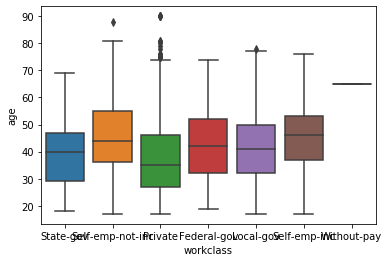

In [819]:
sns.boxplot(x=df["workclass"],y=df["age"])

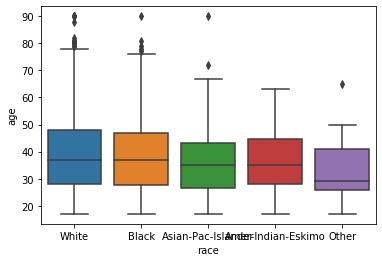

In [820]:
sns.boxplot(x=df["race"],y=df["age"])

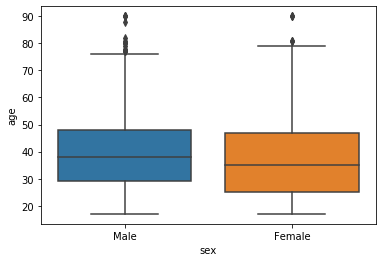

In [821]:
sns.boxplot(x=df["sex"],y=df["age"])

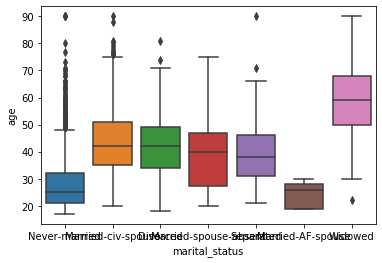

In [822]:
sns.boxplot(x=df["marital_status"],y=df["age"])



In [823]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

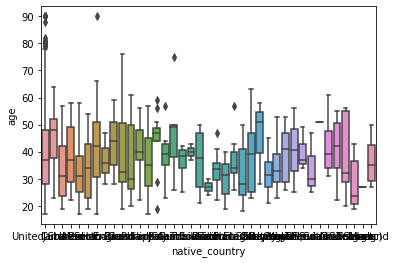

In [824]:
sns.boxplot(x=df["native_country"],y=df["age"])

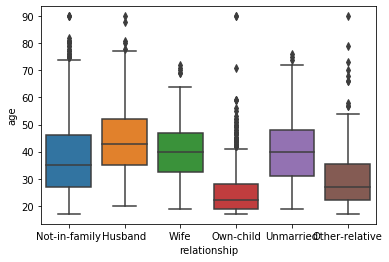

In [825]:
sns.boxplot(x=df["relationship"],y=df["age"])

#Where outliers are almost equally distributed . Lets do age imputing by mean by relationship 
#provided we are not dropping outliers

In [826]:
df["age"]=df.groupby("relationship")["age"].transform(lambda x:x.fillna(x.mean()))

In [827]:
df["age"].isna().value_counts()

False    5000
Name: age, dtype: int64

In [828]:
df["workclass"].replace({np.nan:"Others"},inplace=True)

In [829]:
df["workclass"].isna().value_counts()

False    5000
Name: workclass, dtype: int64

In [830]:
df["occupation"].replace({np.nan:"Others"},inplace=True)

In [831]:
df["occupation"].isna().value_counts()

False    5000
Name: occupation, dtype: int64

In [832]:
df["race"].fillna(df["race"].mode()[0],inplace=True)

In [833]:
df["race"].isna().value_counts()

False    5000
Name: race, dtype: int64

In [834]:
df["native_country"].fillna(df["native_country"].mode()[0],inplace=True)

In [835]:
df["sex"]=df.groupby("relationship")["sex"].transform(lambda x:x.fillna(x.mode()[0]))

In [836]:
df["education_num"]=df.groupby("workclass")["education_num"].transform(lambda x:x.fillna(x.mode()[0]))

In [837]:
df["fnlwgt"]=df.groupby("age")["fnlwgt"].transform(lambda x:x.fillna(x.mean()))
# there is some relationship between age and fnlwgt

In [838]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   workclass       5000 non-null   object 
 2   fnlwgt          5000 non-null   float64
 3   education_num   5000 non-null   float64
 4   marital_status  5000 non-null   object 
 5   occupation      5000 non-null   object 
 6   relationship    5000 non-null   object 
 7   race            5000 non-null   object 
 8   sex             5000 non-null   object 
 9   capital_gain    5000 non-null   int64  
 10  capital_loss    5000 non-null   int64  
 11  hours_per_week  5000 non-null   int64  
 12  native_country  5000 non-null   object 
 13  income          5000 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 547.0+ KB


# Model Creation

# KNN Model

In [840]:
df.dtypes

age               float64
workclass          object
fnlwgt            float64
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income             object
dtype: object

In [844]:
Encodeddf = pd.get_dummies(df[["workclass","marital_status","occupation","relationship","race","sex","native_country"]])

In [850]:
df = pd.concat([Encodeddf,df[["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week","income"]]],axis=1)

In [852]:
from sklearn.preprocessing import StandardScaler

In [853]:
scaler = StandardScaler()

In [856]:
scaled_features = scaler.fit_transform(df.drop("income",axis=1))

In [857]:
from sklearn.model_selection import train_test_split

In [858]:
X_train,X_test, y_train,y_test = train_test_split(scaled_features,df["income"],test_size=.2,random_state=101)

In [870]:
from sklearn.neighbors import KNeighborsClassifier

In [951]:
knn = KNeighborsClassifier(n_neighbors=30)

In [952]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [953]:
pred = knn.predict(X_test)

In [954]:
from sklearn.metrics import classification_report,confusion_matrix

In [955]:
print(confusion_matrix(y_test,pred))

[[708  47]
 [124 121]]


In [956]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89       755
        >50K       0.72      0.49      0.59       245

    accuracy                           0.83      1000
   macro avg       0.79      0.72      0.74      1000
weighted avg       0.82      0.83      0.82      1000



In [949]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

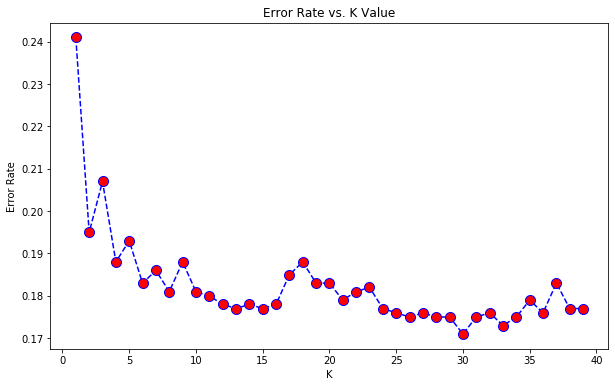

In [950]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')